# Parte 0: Preparación del entorno
- **Cargar la base de datos**: Utilizar pandas para cargar la base de datos que se encuentra en el enlace adjunto. Asegurarse de que los datos están correctamente estructurados.
- **Exploración inicial**: Realizar un análisis exploratorio de datos (EDA) básico para familiarizarse con el contenido. Esto incluye:
    - Mostrar las primeras y últimas filas del dataset.
    - Descripción de las columnas y tipos de datos.
    - Resumen estadístico para las columnas numéricas.
    - Identificación de valores nulos y datos faltantes.

In [2]:
#La base de datos la extraemos desde la api del gobierno con el link: https://www.datos.gov.co/resource/e97j-vuf7.csv?$limit=328100
import pandas as pd #Importación de la libreria pandas
url_data = 'https://www.datos.gov.co/resource/e97j-vuf7.csv?$limit=328100' #Usamos como limite 328100 ya que es el numero maximo de datos
data = pd.read_csv(url_data)
len(data) #Confirmamos que nuestros datos llegaron completos

C:\Users\santo\AppData\Local\Temp\ipykernel_9376\2576919422.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url_data)


328100

In [17]:
#Analizamos la razón de la advertencía al cargar los datos
print(data.dtypes)
#Observamos que los datos no se encuentran correctemente estructurados

fecha_publicaci_n             string[python]
pais_prisi_n                  string[python]
consulado                     string[python]
delito                        string[python]
extraditado_y_o_repatriado    string[python]
situaci_n_jur_dica            string[python]
g_nero                        string[python]
grupo_edad                    string[python]
geocoded_column               string[python]
cantidad                               int64
latitud                              float64
longitud                             float64
dtype: object


In [11]:
#Estructuramos los datos
data = data.astype({
    "fecha_publicaci_n": "string",           # Texto
    "pais_prisi_n": "string",               # Texto
    "consulado": "string",                  # Texto
    "delito": "string",                     # Texto
    "extraditado_y_o_repatriado": "string", # Texto
    "situaci_n_jur_dica": "string",         # Texto
    "g_nero": "string",                     # Texto
    "grupo_edad": "string",                 # Texto
    "geocoded_column": "string",            # Ubicación (como texto)
    "cantidad": "int64",                    # Número entero
    "latitud": "float64",                   # Número decimal
    "longitud": "float64"                   # Número decimal
})

# Confirmamos los tipos de datos
print(data.dtypes)

fecha_publicaci_n             string[python]
pais_prisi_n                  string[python]
consulado                     string[python]
delito                        string[python]
extraditado_y_o_repatriado    string[python]
situaci_n_jur_dica            string[python]
g_nero                        string[python]
grupo_edad                    string[python]
geocoded_column               string[python]
cantidad                               int64
latitud                              float64
longitud                             float64
dtype: object


### Exploración inicial del dataset (EDA)

In [25]:
# Primeras filas del dataset
first_rows = data.head()
first_rows

fecha_publicaci_n    pais_prisi_n      consulado        delito  \
0        2018-09-17         ECUADOR       C. QUITO  NARCOTRÁFICO   
1        2018-09-17          ITALIA        C. ROMA         OTROS   
2        2018-09-17  ESTADOS UNIDOS  C. NUEVA YORK     EXTORSIÓN   
3        2018-09-17          MEXICO      C. MEXICO         OTROS   
4        2018-09-17           JAPON       C. TOKIO  ROBO / HURTO   

  extraditado_y_o_repatriado situaci_n_jur_dica     g_nero    grupo_edad  \
0                DESCONOCIDO          EN JUICIO  MASCULINO   DESCONOCIDO   
1                DESCONOCIDO   EN INVESTIGACIÓN  MASCULINO   DESCONOCIDO   
2                DESCONOCIDO          CONDENADO  MASCULINO        ADULTO   
3                DESCONOCIDO   EN INVESTIGACIÓN  MASCULINO  ADULTO JOVEN   
4                DESCONOCIDO          CONDENADO   FEMENINO  ADULTO MAYOR   

            geocoded_column  cantidad    latitud    longitud  
0   (-1.831239, -78.183406)        45  -1.831239  -78.183406  
1      (41.87194, 12.56738)         1  41.871940   12.567380  
2    (37.09024, -95.712891)         1  37.090240  -95.712891  
3  (23.634501, -102.552784)         7  23.634501 -102.552784  
4   (36.204824, 138.252924)         1  36.204824  138.252924

In [27]:
#Últimas filas del dataset
last_rows = data.tail()
last_rows

fecha_publicaci_n pais_prisi_n      consulado                   delito  \
328095        2024-10-01  DESCONOCIDO      C. MADRID                    OTROS   
328096        2024-10-01  DESCONOCIDO      C. PANAMA  VIOLENCIA INTRAFAMILIAR   
328097        2024-10-01  DESCONOCIDO  C. NUEVA LOJA             ROBO / HURTO   
328098        2024-10-01  DESCONOCIDO   C. GUAYAQUIL  VIOLENCIA INTRAFAMILIAR   
328099        2024-10-01  DESCONOCIDO  C. NUEVA LOJA             NARCOTR�FICO   

       extraditado_y_o_repatriado situaci_n_jur_dica     g_nero    grupo_edad  \
328095                DESCONOCIDO          CONDENADO  MASCULINO   DESCONOCIDO   
328096                DESCONOCIDO   EN INVESTIGACI�N  MASCULINO        ADULTO   
328097                DESCONOCIDO   EN INVESTIGACI�N  MASCULINO   DESCONOCIDO   
328098                DESCONOCIDO   EN INVESTIGACI�N   FEMENINO   DESCONOCIDO   
328099                DESCONOCIDO          CONDENADO  MASCULINO  ADULTO JOVEN   

       geocoded_column  cantidad   latitud   longitud  
328095            <NA>         3       NaN        NaN  
328096            <NA>         5       NaN        NaN  
328097            <NA>         1       NaN        NaN  
328098            <NA>         1 -1.831239 -78.183406  
328099            <NA>         6 -1.831239 -78.183406

In [31]:
# Descripción de las columnas y tipos de datos
columns_info = data.dtypes
columns_info

fecha_publicaci_n             string[python]
pais_prisi_n                  string[python]
consulado                     string[python]
delito                        string[python]
extraditado_y_o_repatriado    string[python]
situaci_n_jur_dica            string[python]
g_nero                        string[python]
grupo_edad                    string[python]
geocoded_column               string[python]
cantidad                               int64
latitud                              float64
longitud                             float64
dtype: object

In [33]:
# Resumen estadístico para las columnas numéricas
numerical_summary = data.describe()
numerical_summary

cantidad        latitud       longitud
count  328100.000000  291933.000000  291933.000000
mean        4.843532      13.516014     -45.013250
std        17.116960      23.103282      47.353820
min         1.000000     -40.900557    -106.346771
25%         1.000000       0.000000     -78.183406
50%         1.000000       6.423750     -66.589730
75%         3.000000      37.090240      -3.435973
max       460.000000      61.924110     174.885971

In [35]:
# Identificación de valores nulos y datos faltantes
missing_values = data.isnull().sum()
missing_values

fecha_publicaci_n                  0
pais_prisi_n                       0
consulado                          0
delito                             0
extraditado_y_o_repatriado         0
situaci_n_jur_dica                 0
g_nero                             0
grupo_edad                         0
geocoded_column               206273
cantidad                           0
latitud                        36167
longitud                       36167
dtype: int64

# Parte 1: Visualización de datos
**Instrucciones**
1. **Gráfico de barras**: Situación jurídica. Crear un gráfico de barras que muestre la cantidad total de detenidos por cada categoría de “Situación Jurídica”.
2. **Mapa de calor**: Países de prisión. Crear un gráfico tipo mapa de calor que muestre la cantidad de detenidos en cada país. Utilizar la columna latitud y longitud para ubicar los puntos en el mapa.
3. **Gráfico de pastel**: Distribución por género. Crear un gráfico de pastel para mostrar la distribución de los detenidos según el género.
4. **Gráfico de barras apiladas**: Edad y género Crear un gráfico de barras apiladas para visualizar la cantidad de detenidos por grupo de edad y separados por género (piramide poblacional).
5. **Línea de tiempo**: Evolución de detenidos. Crear un gráfico de líneas que muestre la cantidad total de detenidos por fecha de publicación.


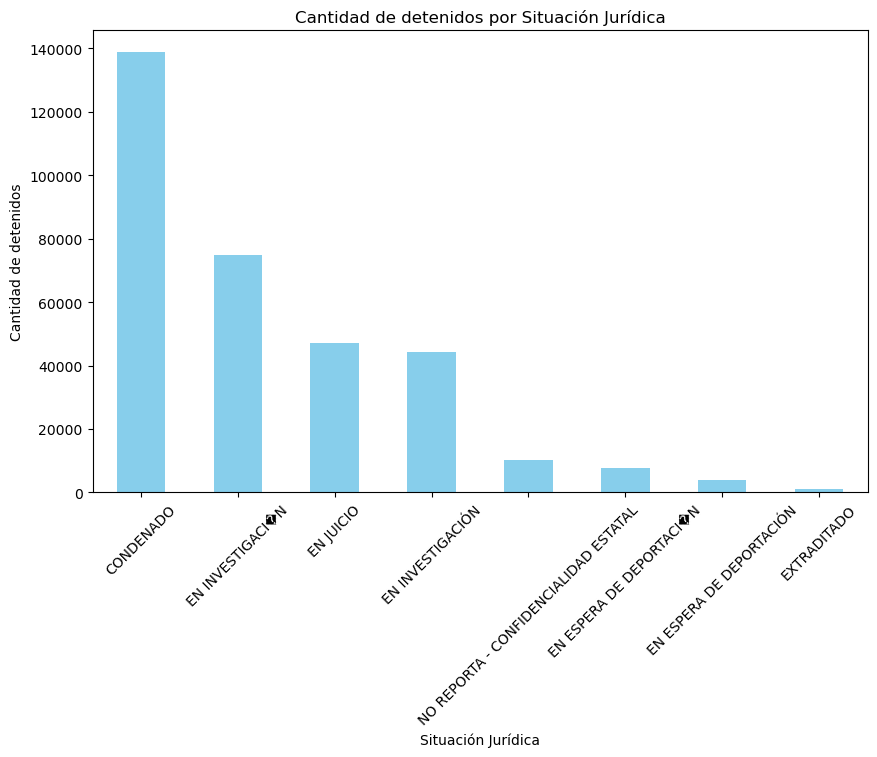

In [47]:
import matplotlib.pyplot as plt
# Gráfico de barras: Situación jurídica
plt.figure(figsize=(10, 6))
data["situaci_n_jur_dica"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Cantidad de detenidos por Situación Jurídica")
plt.xlabel("Situación Jurídica")
plt.ylabel("Cantidad de detenidos")
plt.xticks(rotation=45)
plt.show()

In [51]:
!pip install folium

   ---------------------------------------- 0.0/108.9 kB ? eta -:--:--
   --------------- ------------------------ 41.0/108.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 108.9/108.9 kB 3.2 MB/s eta 0:00:00


In [60]:
# Mapa de calor: Países de prisión
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Crear el mapa centrado en la media de latitud y longitud
mapa_calor = folium.Map(location=[data["latitud"].mean(), data["longitud"].mean()], zoom_start=3)

# Crear los datos de calor y agregarlos al mapa
heat_data = data[["latitud", "longitud"]].dropna()
HeatMap(heat_data.values).add_to(mapa_calor)

# Mostrar el mapa
display(mapa_calor)

# Parte 2: POO
**Instrucciones**
1. **Crear una clase abstracta**: Implementar una clase abstracta llamada Detenido que sirva como base para todos los detenidos en la base de datos.
- Atributos:
  - `nombre` (nombre del detenido)
  - `edad` (edad del detenido)
  - `genero` (género del detenido)
  - `pais_prision` (país donde se encuentra detenido)
  - `situacion_juridica` (situación jurídica actual)
  - `delito` (delito por el que está detenido)
- Métodos abstractos:
  - `mostrar_informacion()`: Método abstracto que debe ser implementado por las clases derivadas para mostrar la información básica del detenido.
  - `riesgo_de_extradicion()`: Método abstracto para determinar el riesgo de extradición o repatriación según su situación jurídica.
1. **Crear clases derivadas**: Implementar dos clases derivadas que hereden de Detenido.
    - Clase `DetenidoPorNarcotrafico`
      - Atributos Adicionales:
        - `cantidad_droga` (cantidad de droga incautada, en kg)
      - Métodos:
        - `mostrar_informacion()`: Implementar este método para mostrar toda la información del detenido, incluyendo la cantidad de droga incautada.
        - `riesgo_de_extradicion()`: Implementar este método para evaluar si hay riesgo de extradición según la cantidad de droga incautada (por ejemplo, más de 5 kg puede considerarse de alto riesgo).
    - Clase `DetenidoPorFraude`
      - Atributos Adicionales:
        - `monto_fraude` (monto en dólares del fraude)
      - Métodos:
        - `mostrar_informacion()`: Implementar este método para mostrar toda la información del detenido, incluyendo el monto del fraude.
        - `riesgo_de_extradicion()`: Implementar este método para evaluar el riesgo de extradición en función del monto del fraude (por ejemplo, más de $1,000,000 puede considerarse de alto riesgo).
2.  Ejemplo de Uso
    - Crear instancias de `DetenidoPorNarcotrafico` y `DetenidoPorFraude`.
    - Llamar a los métodos `mostrar_informacion()` y `riesgo_de_extradicion()` para demostrar cómo funcionan las clases derivadas.


# Parte 3: Video
Explica brevemente cómo el uso de clases abstractas y la herencia en la Programación Orientada a Objetos facilita la organización y el análisis de datos complejos. Menciona un ejemplo concreto de cómo una clase derivada puede añadir funcionalidad específica.